In [1]:
from sage.all import *

In [2]:
x_diff, y_diff, t = var("x_diff, y_diff, t")

In [3]:
def discrete_set_of_tangents(curvature_func, inf_interval, sup_interval,
                             init_velocity, n_pts):
    tangents = desolve_odeint(
        [-curvature_func * y_diff, curvature_func * x_diff],
        init_velocity,
        srange(
            inf_interval,
            sup_interval,
            (sup_interval - inf_interval) / n_pts
        ),
        [x_diff, y_diff]
    )
    return tangents

In [4]:
def approximate_position_in_the_ith_step(curvature_func, inf_interval,
                                         sup_interval, init_position,
                                         set_of_tangents, n_pts):
    subpartition = [
        discrete_set_of_tangents(
            curvature_func,
            inf_interval + i * ((sup_interval - inf_interval) / n_pts),
            inf_interval + (i + 1) * ((sup_interval - inf_interval) / n_pts),
            set_of_tangents[i],
            n_pts
        ) for i in range(n_pts)
    ]
    positions = [
        [
            init_position[0] + sum(
                [
                    sum(
                        [v[0] for v in subpartition[j]]
                    ) * (sup_interval - inf_interval) / n_pts
                    for j in range(i)
                ]
            ),
            init_position[1] + sum(
                [
                    sum(
                        [v[1] for v in subpartition[j]]
                    ) * (sup_interval - inf_interval) / n_pts
                    for j in range(i)
                ]
            )
        ] for i in range(n_pts)
    ]
    return positions

In [5]:
curvature_func(t) = t
inf_interval = 0.000000
sup_interval = 3.141592 * 2
init_position = [0.000000, 0.000000]
init_velocity = [1.000000, 1.000000]
n_pts = 128

In [7]:
set_of_tangents = discrete_set_of_tangents(curvature_func, inf_interval,
                                           sup_interval, init_velocity, n_pts)
set_of_points = approximate_position_in_the_ith_step(curvature_func,
                                                     inf_interval,
                                                     sup_interval,
                                                     init_position,
                                                     set_of_tangents, n_pts)
P = points(set_of_points)

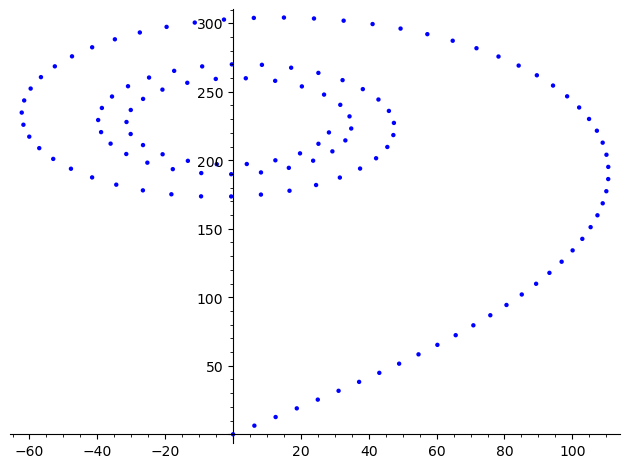

In [8]:
P